# PCA and Correlation of the reduced list of hardware performance counters

Load database

In [1]:
library("factoextra")
path="C:/Users/Jordi/Desktop/Jupyter/Paper/"
setwd(path)
mydata = read.csv("data.csv", sep=";")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Remove unnecessary columns and remove discard hardware performance counters selected with PCA and correlation analysis

In [2]:
new_mydata = mydata[,5:61]

#Removed due to being 0, rows where all are 0's give errors in corrplot
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_DP))
new_mydata <- subset(new_mydata, select = -c(PAPI_SP_OPS))
new_mydata <- subset(new_mydata, select = -c(PAPI_VEC_SP))

dim(new_mydata)


[1] 448000     54

Normalize data, separate labels and execute PCA

In [3]:
escaled_data <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata[,4]
res.pca <- prcomp(escaled_data, center = TRUE, scale. = TRUE)
summary(res.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     6.5387 2.32006 1.18209 1.03981 0.80800 0.76099 0.68169
Proportion of Variance 0.7917 0.09968 0.02588 0.02002 0.01209 0.01072 0.00861
Cumulative Proportion  0.7917 0.89142 0.91730 0.93732 0.94941 0.96013 0.96874
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.63936 0.55754 0.52774 0.51919 0.39633 0.37292 0.22917
Proportion of Variance 0.00757 0.00576 0.00516 0.00499 0.00291 0.00258 0.00097
Cumulative Proportion  0.97631 0.98206 0.98722 0.99221 0.99512 0.99770 0.99867
                          PC15   PC16   PC17    PC18  PC19    PC20    PC21
Standard deviation     0.16783 0.1461 0.1041 0.09043 4e-02 0.03220 0.01708
Proportion of Variance 0.00052 0.0004 0.0002 0.00015 3e-05 0.00002 0.00001
Cumulative Proportion  0.99919 0.9996 0.9998 0.99994 1e+00 0.99999 0.99999
                          PC22     PC23     PC

Calculate variance

In [4]:
eig <- (res.pca$sdev)^2
variance <- eig*100/sum(eig)
dfvariance <- data.frame(variance)

Show variance in each PCA

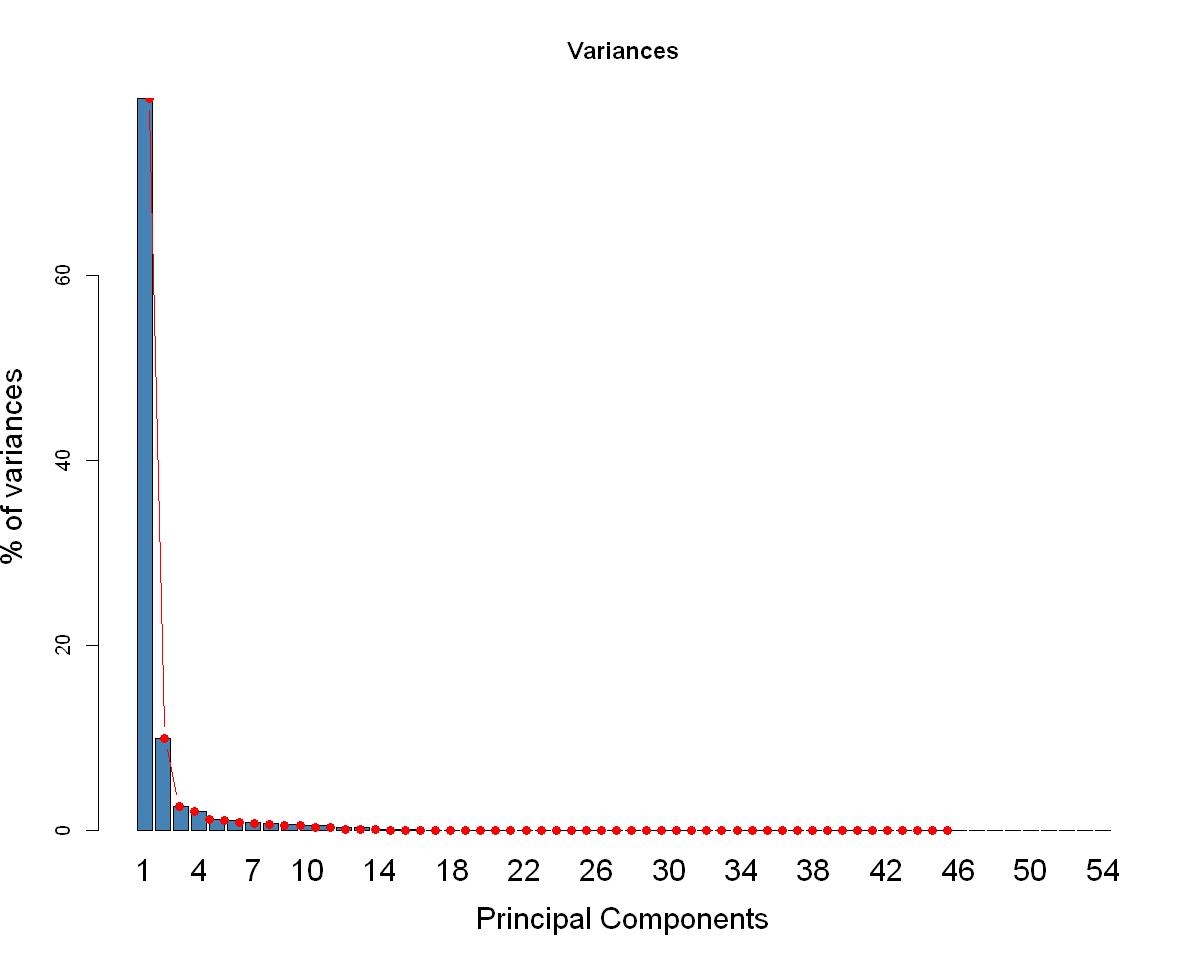

In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
barplot(dfvariance[, 1], names.arg=1:nrow(dfvariance), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "% of variances",
       col ="steelblue",
       cex.names=1.5,
       cex.lab=1.5)
# Add connected line segments to the plot
lines(x = 1:nrow(dfvariance), 
      dfvariance[, 1], 
      type="b", pch=19, col = "red")

Show PCA graph

Loading required package: usethis
Loading required package: plyr
Loading required package: scales
Loading required package: grid


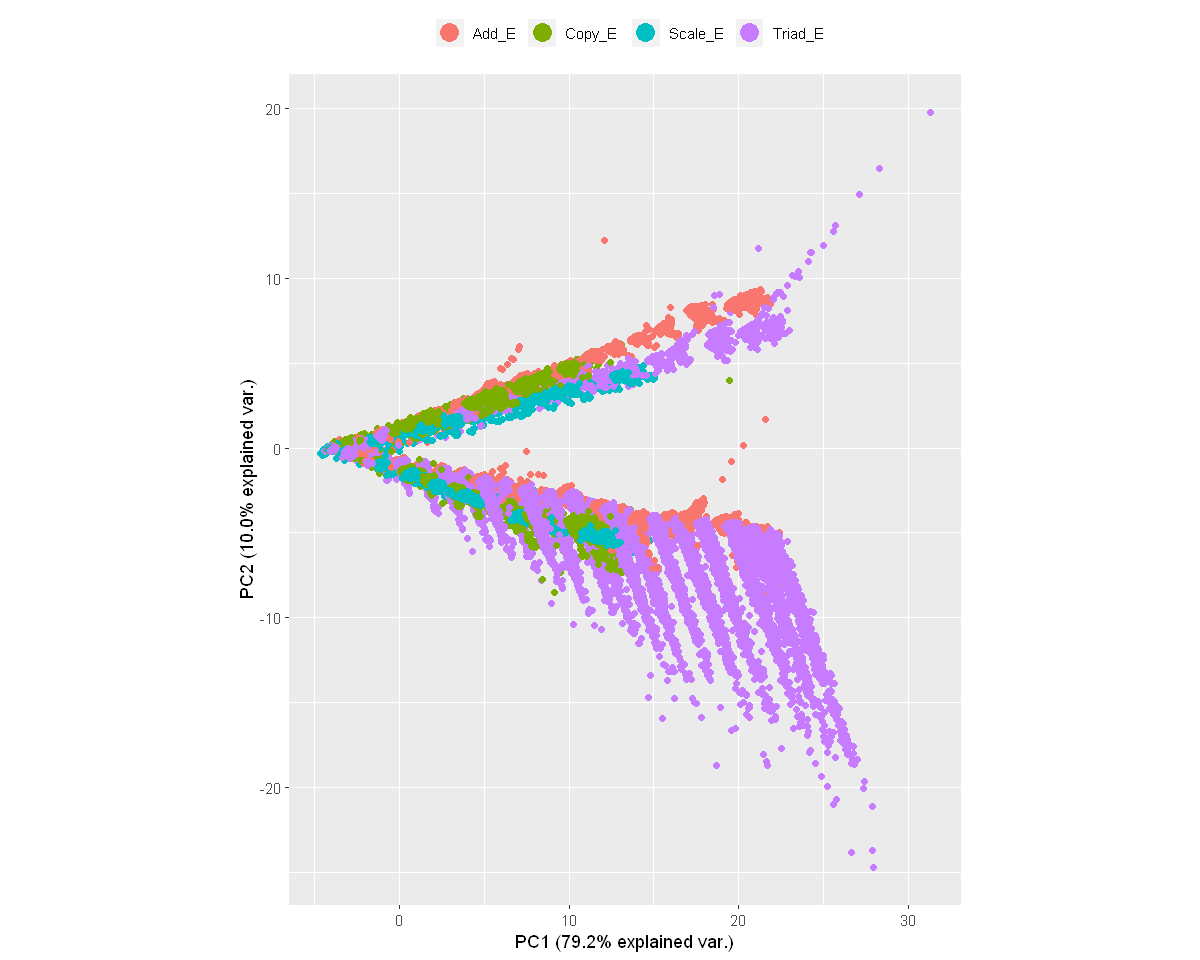

In [6]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
g <- g + guides(color = guide_legend(override.aes = list(size=5)))
print(g)

Load data without without normalizing to calculate correlation

In [7]:
new_mydata1 = mydata[,5:61]

#Removed due to being 0, rows where all are 0's give errors in corrplot
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_SP_OPS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)

Show Correlation Analysis matrix

corrplot 0.84 loaded


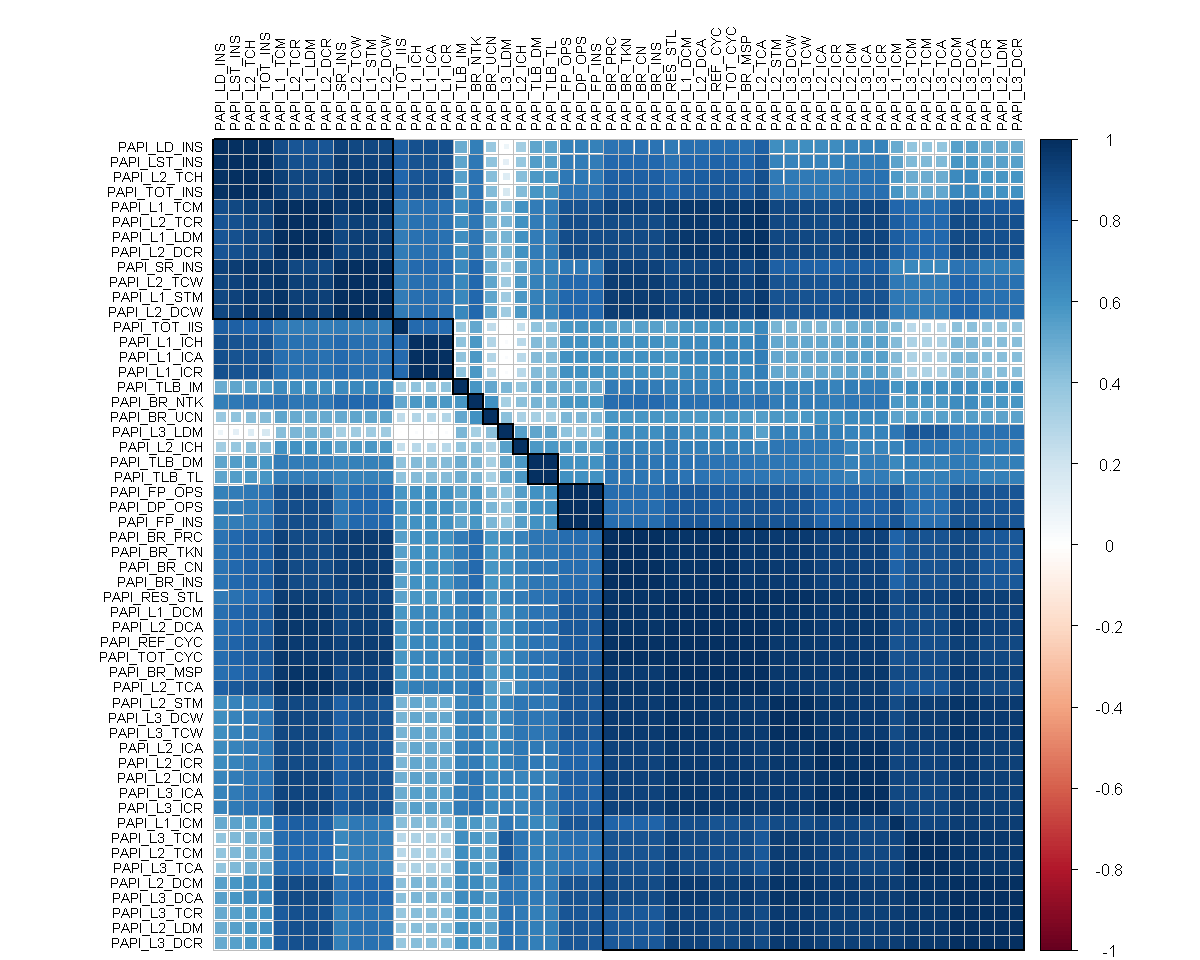

In [8]:
library(corrplot)
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

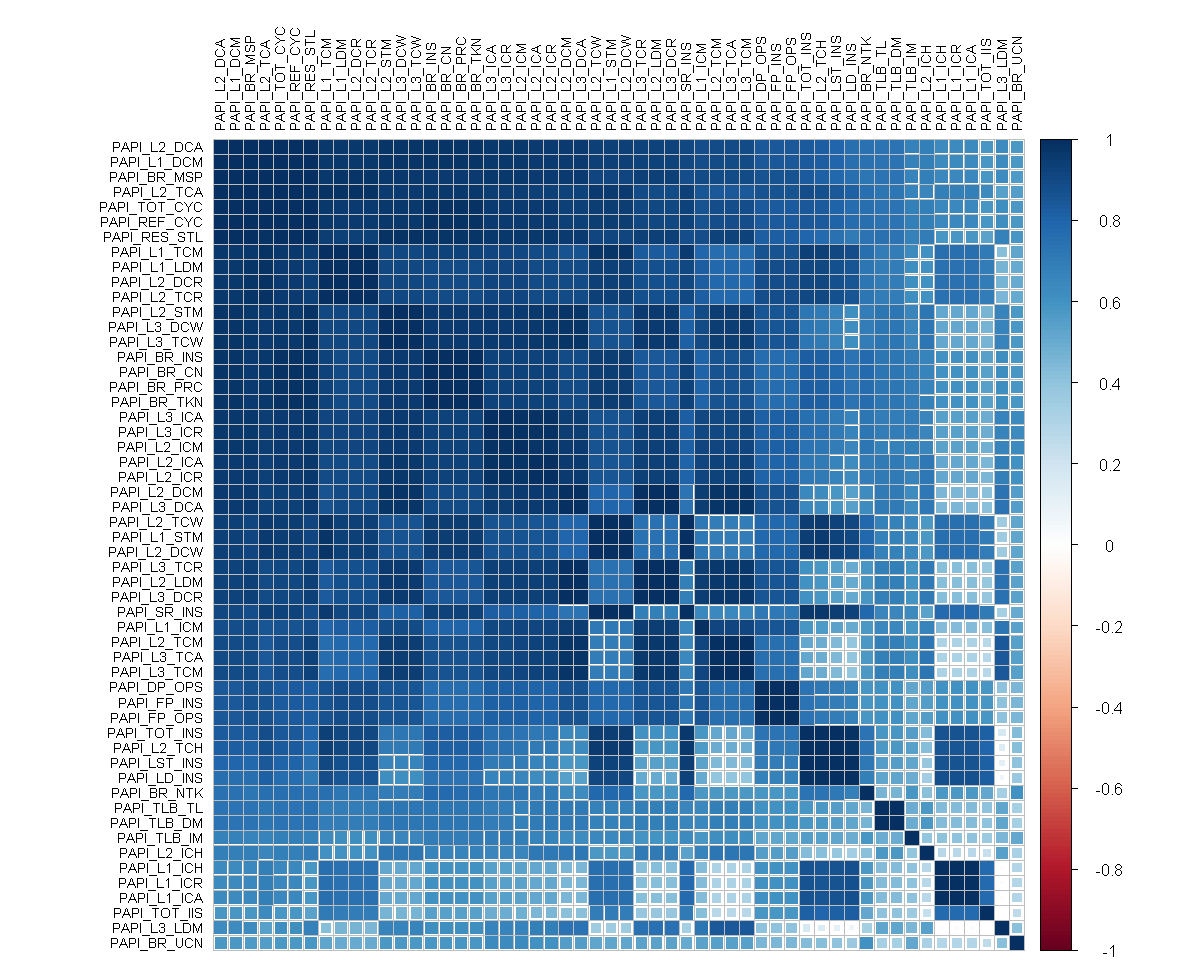

In [9]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

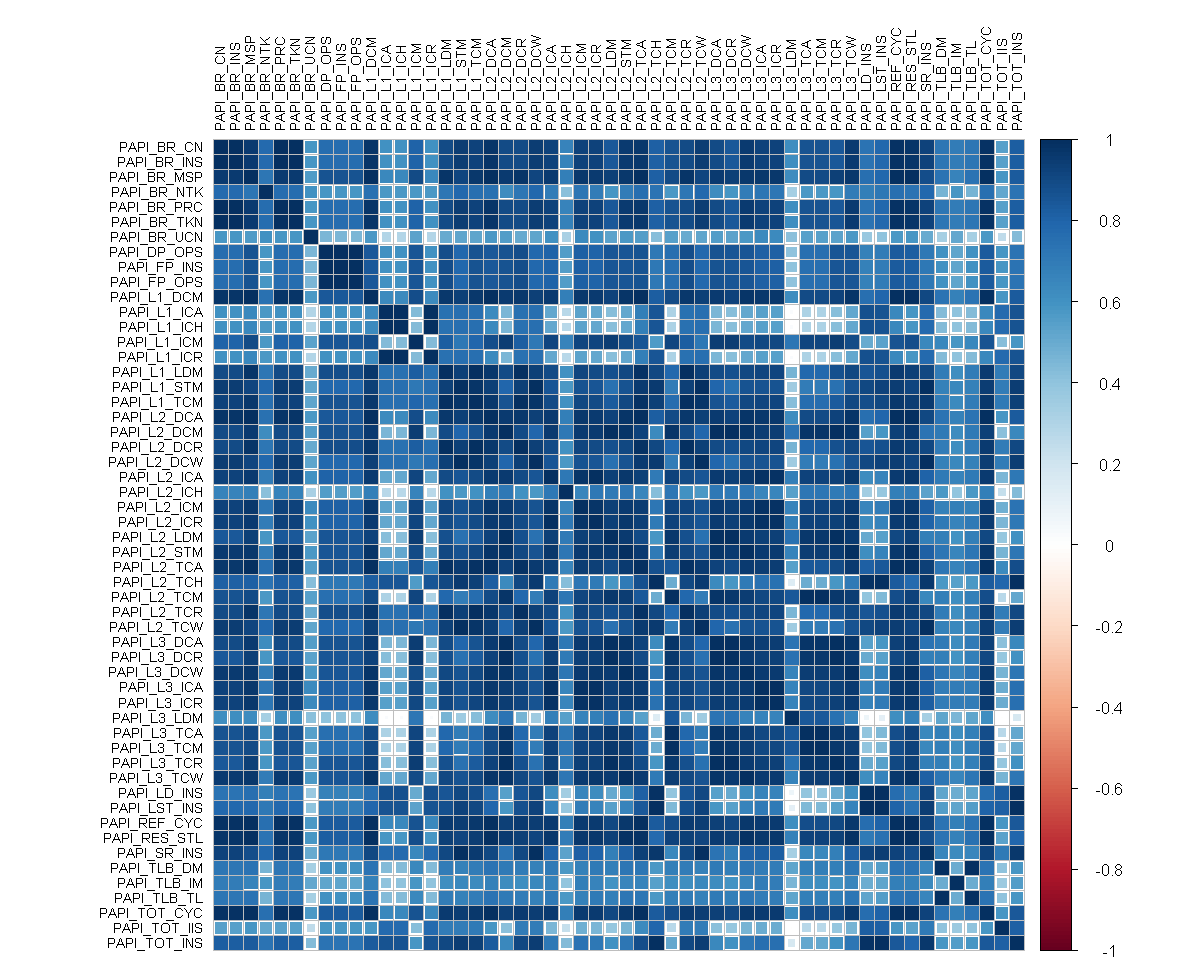

In [10]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)